# **Task**:

- Developing RNN / LSTM from scratch
- Weight Init + Layer Norm
- Language Modelling
---

## Load the data
---

In [ ]:
# Load this library
import numpy as np
import pandas as pd


import math
import os
import re
from typing import Tuple

import torch
import torch.nn.functional as F
from torch import nn, Tensor

from torchtext import datasets

from tqdm import tqdm
import time

import matplotlib.pyplot as plt
import seaborn as sns

# before building things we are going to do the basic preparation
# such as settings seed , numpy and torch

g = torch.Generator().manual_seed(42)

np.random.seed(42)

Load the data from given data path

In [ ]:
news_data_path = 'artikel_katadata_medium.csv'

In [ ]:
news_data = pd.read_csv(news_data_path).values.tolist()

In [ ]:
news_data[0]

['Anak usaha Alibaba\t Ant Group mencatatkan penurunan laba 37% pada kuartal yang berakhir Maret\t dibandingkan kuartal sebelumnya. Ini terjadi di saat Tiongkok mengeluarkan sejumlah aturan baru terkait perusahaan teknologi. Berdasarkan laporan keuangan perusahaan\t Ant Group mencatatkan laba US$ 2\t1 miliar atau Rp 30 triliun pada kuartal pertama. Raksasa teknologi finansial (fintech) ini menyumbang hampir US$ 696 juta atau Rp 9\t"9 triliun untuk pendapatan Alibaba. Alibaba mempunyai sepertiga saham di Ant Group. ""Berarti laba turun 37% dari tiga bulan sebelumnya"\t" demikian dikutip dari Bloomberg, Selasa (3/8). Analis menilai, laba Ant Group turun karena tantangan dari tindakan keras pemerintah Tiongkok. Beijing sempat meminta Ant Group merombak bisnis, menjadi hanya berfokus pada layanan pembayaran. Itu karena Beijing khawatir dengan pertumbuhan Ant Group yang sangat cepat. Utamanya, pada sektor pinjam-meminjam, asuransi, dan investasi. Regulator Tiongkok juga mengeluarkan serangk

In [ ]:
sentences = []
for news in news_data :
  splitted_news = news[0].split('.')
  for splitted in splitted_news :
      sentences.append(splitted)

Yes, we have some duplicated data. Let's see the duplicated data.

## Create load function
---

Finally, we can create load data function

In [ ]:
def load_news_data(data_path):
    """
    Function to load news data
        & removing duplicate data on news  data

    Parameters
    ----------
    data_path : str
        news  data path

    Returns
    -------
    news_data : pandas DataFrame
        Indonesian news data
    """
    # Load data
    news_data = pd.read_csv(news_data_path).values.tolist()

    # # extract into sentences level
    # sentences = []
    # for news in tqdm(news_data) :
    #   splitted_news = news[0].split('.')
    #   for splitted in splitted_news :
    #       sentences.append(splitted)


    return news_data


In [ ]:
news_data = load_news_data(data_path = news_data_path)

In [ ]:
news_data

[['Anak usaha Alibaba\t Ant Group mencatatkan penurunan laba 37% pada kuartal yang berakhir Maret\t dibandingkan kuartal sebelumnya. Ini terjadi di saat Tiongkok mengeluarkan sejumlah aturan baru terkait perusahaan teknologi. Berdasarkan laporan keuangan perusahaan\t Ant Group mencatatkan laba US$ 2\t1 miliar atau Rp 30 triliun pada kuartal pertama. Raksasa teknologi finansial (fintech) ini menyumbang hampir US$ 696 juta atau Rp 9\t"9 triliun untuk pendapatan Alibaba. Alibaba mempunyai sepertiga saham di Ant Group. ""Berarti laba turun 37% dari tiga bulan sebelumnya"\t" demikian dikutip dari Bloomberg, Selasa (3/8). Analis menilai, laba Ant Group turun karena tantangan dari tindakan keras pemerintah Tiongkok. Beijing sempat meminta Ant Group merombak bisnis, menjadi hanya berfokus pada layanan pembayaran. Itu karena Beijing khawatir dengan pertumbuhan Ant Group yang sangat cepat. Utamanya, pada sektor pinjam-meminjam, asuransi, dan investasi. Regulator Tiongkok juga mengeluarkan serang

## Preprocess data
---

## Text Preprocessing


---

For now, we will use tokenizer based on english language, from spacy

### Create Processing function

In [ ]:
def preprocess_tokens(text) :
    """
    Function to preprocess data

    Parameters :
    ----------
    data : pd.DataFrame
         dataframe contain text data
    text_col : str
          column name of text
    """
    # lowercase

    text = text.lower()
    # remove digits
    text = re.sub(r'\d', '', text)


    # remove punctuation
    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'\t', '', text)

    # extract token based on space / word level
    tokens = text.split(' ')

    updated_tokens = []
    not_allowed_tokens = ['']
    updated_tokens = [token for token in tokens if token not in not_allowed_tokens]



    return updated_tokens

In [ ]:
processed_sentences = [preprocess_tokens(text) for news in news_data for text in news]
processed_sentences

[['anak',
  'usaha',
  'alibaba',
  'ant',
  'group',
  'mencatatkan',
  'penurunan',
  'laba',
  'pada',
  'kuartal',
  'yang',
  'berakhir',
  'maret',
  'dibandingkan',
  'kuartal',
  'sebelumnya',
  'ini',
  'terjadi',
  'di',
  'saat',
  'tiongkok',
  'mengeluarkan',
  'sejumlah',
  'aturan',
  'baru',
  'terkait',
  'perusahaan',
  'teknologi',
  'berdasarkan',
  'laporan',
  'keuangan',
  'perusahaan',
  'ant',
  'group',
  'mencatatkan',
  'laba',
  'us',
  'miliar',
  'atau',
  'rp',
  'triliun',
  'pada',
  'kuartal',
  'pertama',
  'raksasa',
  'teknologi',
  'finansial',
  'fintech',
  'ini',
  'menyumbang',
  'hampir',
  'us',
  'juta',
  'atau',
  'rp',
  'triliun',
  'untuk',
  'pendapatan',
  'alibaba',
  'alibaba',
  'mempunyai',
  'sepertiga',
  'saham',
  'di',
  'ant',
  'group',
  'berarti',
  'laba',
  'turun',
  'dari',
  'tiga',
  'bulan',
  'sebelumnya',
  'demikian',
  'dikutip',
  'dari',
  'bloomberg',
  'selasa',
  'analis',
  'menilai',
  'laba',
  'ant',


We are going to select which sentence we are going to use by thresholding minimum word, let say 3

## Collect Corpus

So how do we collect our training data ? First we decide context length we want, let say 30 words

In [ ]:
example_sentence = processed_sentences[0][:30]
example_sentence

['anak',
 'usaha',
 'alibaba',
 'ant',
 'group',
 'mencatatkan',
 'penurunan',
 'laba',
 'pada',
 'kuartal',
 'yang',
 'berakhir',
 'maret',
 'dibandingkan',
 'kuartal',
 'sebelumnya',
 'ini',
 'terjadi',
 'di',
 'saat',
 'tiongkok',
 'mengeluarkan',
 'sejumlah',
 'aturan',
 'baru',
 'terkait',
 'perusahaan',
 'teknologi',
 'berdasarkan',
 'laporan']

The training data should look like

In [ ]:
X = example_sentence[:-1]
y = example_sentence[1:]

for a,b in zip(X,y) :
  print(f'Input {a} --> {b}')

Input anak --> usaha
Input usaha --> alibaba
Input alibaba --> ant
Input ant --> group
Input group --> mencatatkan
Input mencatatkan --> penurunan
Input penurunan --> laba
Input laba --> pada
Input pada --> kuartal
Input kuartal --> yang
Input yang --> berakhir
Input berakhir --> maret
Input maret --> dibandingkan
Input dibandingkan --> kuartal
Input kuartal --> sebelumnya
Input sebelumnya --> ini
Input ini --> terjadi
Input terjadi --> di
Input di --> saat
Input saat --> tiongkok
Input tiongkok --> mengeluarkan
Input mengeluarkan --> sejumlah
Input sejumlah --> aturan
Input aturan --> baru
Input baru --> terkait
Input terkait --> perusahaan
Input perusahaan --> teknologi
Input teknologi --> berdasarkan
Input berdasarkan --> laporan


In [ ]:
n_context = 20

In [ ]:
def collect_training_data(news_data,n_context=20) :
  collected_training_data = []
  for news in news_data :
    # perform sliding window
    start = 0
    end=n_context+start
    # get maximum length
    n_loops = len(news) // n_context
    for i in range(n_loops) :
      if i+1 == n_loops :
        # check if it can fit into full
        end_location = start + n_context-1 if len(news[start:]) > n_context else len(news[start:])
        training_data = news[start:end_location]
        collected_training_data.append(training_data)
      else :
        training_data = news[start:end]
        start = end+1
        end = start + n_context-1
        collected_training_data.append(training_data)
  return collected_training_data


In [ ]:
corpus = collect_training_data(processed_sentences,n_context=20)

In [ ]:
len(corpus)

3913

Validate if we have 20 context length at all training samples

In [ ]:
for c in corpus :
  if len(c) > 20 :
    print('There is ',len(c))

Okay we are good then

### Next Step : Adding Special Token

- Starting Token such as `<s>`
- End of Sentence Token such as `</s>`
- Padding Token such as `<pad>`

In [ ]:
n_context = 20 + 2 # 2 from special token
eos = '</s>'
sos = '<s>'
pad_token = '<pad>'

def add_special_token(corpus,n_context,SOS=sos,EOS=eos,PAD=pad_token) :
    collected = []
    for text in corpus :
      text = f'{SOS} {" ".join(text)} {EOS}'.split(' ')


      if len(text) < n_context :
        padd_num = n_context - len(text)
        text = text + [PAD]*padd_num

        collected.append(text)
      else :
        collected.append(text)

    return collected

In [ ]:
ready_corpus = add_special_token(corpus=corpus,n_context=n_context)


In [ ]:
for c in ready_corpus :
  if len(c) > 22 :
    print(c)
    print(len(c))
    break

In [ ]:
len(ready_corpus)

3913

### Mapping all token

We already collect all the sentences, back to language modelling.
We represent each word / token with vector, the vector from all vocabularies build up as a matrix

But how do we get a vector for a word, we cannot directly search using the word itself. Instead we use `index` or `position`. Hence we need to create mapping for our vocabulary.

```
word_to_idx = {"wordA" : 0 ,
               "wordB" : 1,
               ..
               "wordN" : N-1}
```

```
idx_to_word = { 0 :"wordA" ,
                1 : "wordB",
               ..
                N-1: "wordN"}
```

#### Collect vocabulary

In [ ]:
len(ready_corpus)

3913

In [ ]:
# collecting vocabulary
vocabs = []
for sentence in  ready_corpus :
    for vocab in sentence :
      vocabs.append(vocab)
vocabs = list(set(vocabs))

In [ ]:
vocabs[:5]

['', 'ekonom', 'ungul', 'prokes', 'melalui']

In [ ]:
vocabs[1]

'ekonom'

In [ ]:
word_to_idx = {word:idx for idx,word in enumerate(vocabs)}
idx_to_word = {idx : word for idx,word in enumerate(vocabs)}

In [ ]:
pad_idx = word_to_idx[pad_token]
eos_idx = word_to_idx[eos]
sos_idx = word_to_idx[sos]

## Prepare training Data

### Mapping text to index

In [ ]:
def get_idx(word) :
  return word_to_idx[word]


def get_word(idx) :
  return idx_to_word[idx]

In [ ]:
def collect_training_data(corpus,n_context,word_to_idx) :
    training_word_idx = np.zeros(shape=(len(corpus),n_context))
    for idx,sentence in enumerate(corpus) :
      result = np.array(list(map(get_idx,sentence)))
      training_word_idx[idx] = result
    training_word_idx = torch.from_numpy(training_word_idx).type(torch.LongTensor)
    return training_word_idx

In [ ]:
training_idx = collect_training_data(corpus=ready_corpus,n_context=n_context,word_to_idx=word_to_idx)

### Split X and y

In [ ]:
X = training_idx[:,:-1]
y = training_idx[:,1:]

In [ ]:
X.shape

torch.Size([3913, 21])

In [ ]:
X[0]

tensor([1062, 3805, 1419, 2370, 4762, 4906, 4910, 4629, 1498, 3809, 2220, 3273,
         885, 5048, 3937, 2220, 6398, 5523, 8756, 1420, 7598])

In [ ]:
y[0]

tensor([3805, 1419, 2370, 4762, 4906, 4910, 4629, 1498, 3809, 2220, 3273,  885,
        5048, 3937, 2220, 6398, 5523, 8756, 1420, 7598,  187])

### Split our data into 3 Sets

- Training
- Test
- Validation

In [ ]:
idx_80 = int(0.8*len(X))
idx_90 = int(0.9*len(X))
X_train,y_train = X[:idx_80],y[:idx_80]
X_val,y_val = X[idx_80:idx_90],y[idx_80:idx_90]
X_test,y_test =  X[idx_90:],y[idx_90:]

In [ ]:
print(f'''\t X_train shape : {X_train.shape} y_train shape :{y_train.shape}  \n
          X_val shape : {X_val.shape} y_val shape :{y_val.shape}  \n
          X_test shape : {X_test.shape} y_test shape :{y_test.shape}
          ''')

	 X_train shape : torch.Size([3130, 21]) y_train shape :torch.Size([3130, 21])  

          X_val shape : torch.Size([391, 21]) y_val shape :torch.Size([391, 21])  

          X_test shape : torch.Size([392, 21]) y_test shape :torch.Size([392, 21])
          


Let's create function to return minibatch of data from our dataset

In [ ]:
idx_to_word[pad_idx]

'<pad>'

In [ ]:
generator = torch.Generator().manual_seed(42)
def get_batches(split,batch_size,device='cpu',g=generator) :
  options = {
      'train': (X_train,y_train),
      'val':   (X_val,y_val),
      'test' : (X_test,y_test)
  }
  X_split,y_split = options[split]
  ix = torch.randint(0, X_split.shape[0], (batch_size,), generator=g)
  X_batch = X_split[ix].to(device)
  y_batch = y_split[ix].to(device)
  return X_batch,y_batch

In [ ]:
X_sample,y_sample = get_batches(split='train',batch_size=1)

In [ ]:
X_sample.shape

torch.Size([1, 21])

In [ ]:
y_sample.shape

torch.Size([1, 21])

## Developing LSTM / RNN from Scratch

## **Component**


### RNN Cell

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/RNN-unrolled.png">

Each RNN Cell Component contains :     
Input :     
1. Current Embedding / Vectors ($X_t$)
2. Previous Hidden State ($h_{t-1}$)



The operation in each cell is

**Preactivation Step** :




$z = W_{hh} X_t + W_{h_{t-1}} h_{t-1} + b $


**Activation Step** :     

$h_t = Tanh(W_z z + b)$



#### Functional Approach to RNN Cell

Let's craft each component one by one

In [ ]:
n_vocab = len(vocabs)
n_vocab

8837

In [ ]:
# number of vocab
n_vocab = len(vocabs)
# embedding / vector dimension
n_dim = 10

n_hidden = 100

# embedding for each word
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)

# weight matrix for current input
W_preact = torch.rand(size=(n_dim*2,n_dim),generator=g)

W_act = torch.rand(size=(n_dim,n_dim),generator=g)

b_preact = torch.rand(size=(n_dim,),generator=g)

# projection weight --> to yield logit --> probabilities
project = torch.rand(size=(n_dim,n_vocab),generator=g)

b_act   = torch.rand(size=(n_dim,),generator=g)

In [ ]:
# fetch sample data
X_sample,y_sample = get_batches(split='train',batch_size=1)

In [ ]:
X_sample.shape

torch.Size([1, 21])

In each step, we only feed 1 from sequence length

In [ ]:
# get embedding
current_input = word_embedding[X_sample[:,0]]


# at first iteration , prev hidden states usually initialized or set to zeros
prev_hidden = torch.zeros(size=(1,n_dim))
prev_hidden

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
current_input.shape

torch.Size([1, 10])

In [ ]:
input = torch.cat([current_input,prev_hidden],dim=-1)
z = input @ W_preact + b_preact

Text(0.5, 1.0, 'Pre Activation Distribution')

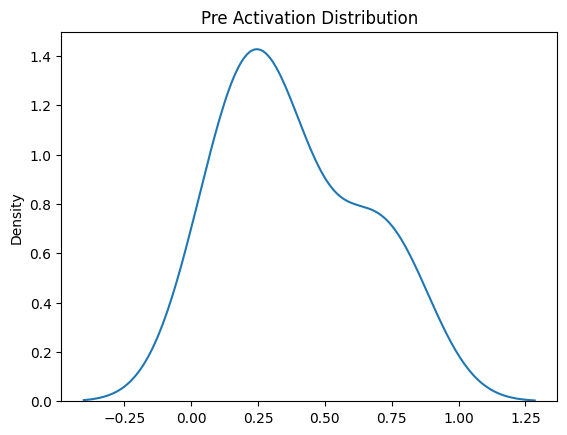

In [ ]:
# check preactivation distribution

sns.kdeplot(x=z.view(-1).cpu().detach().numpy())
plt.title('Pre Activation Distribution')

<Axes: ylabel='Count'>

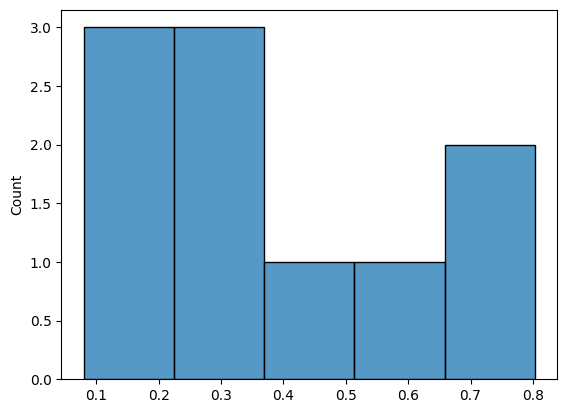

In [ ]:
sns.histplot(x=z.view(-1).cpu().detach().numpy())

The output of z should be --> `[BATCH SIZE,N_DIM]`

In [ ]:
z.shape

torch.Size([1, 10])

Activation Phase

the activated value, should have size of --> `[BATCH SIZE,N_DIM]`

In [ ]:
act = F.tanh(z@ W_act + b_act)
act

tensor([[0.9476, 0.9894, 0.9927, 0.9930, 0.9942, 0.9876, 0.8828, 0.9797, 0.9985,
         0.9905]])

Text(0.5, 1.0, 'Pre Activation Distribution')

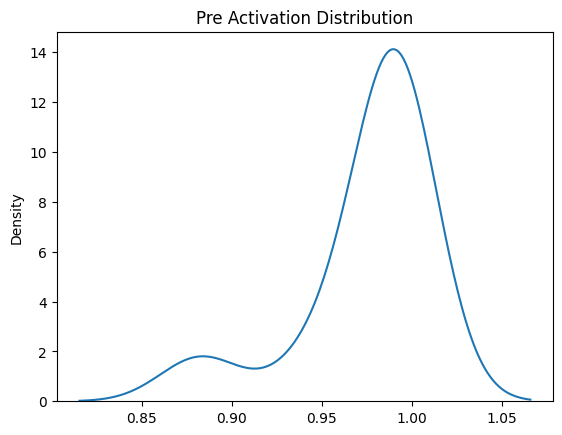

In [ ]:
# check post activation distribution  distribution

sns.kdeplot(x=act.view(-1).cpu().detach().numpy())
plt.title('Pre Activation Distribution')

Projection Phase

In [ ]:
logit = act @ project
logit

tensor([[3.1888, 3.2550, 4.1086,  ..., 7.0285, 3.9873, 4.1641]])

Text(0.5, 1.0, 'Projection Distribution')

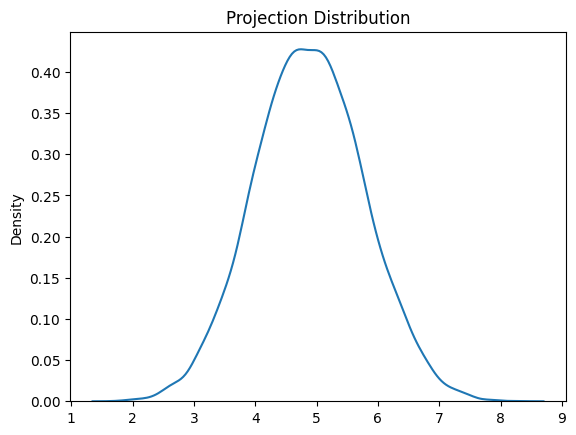

In [ ]:
# check post activation distribution  distribution

sns.kdeplot(x=logit.view(-1).cpu().detach().numpy())
plt.title('Projection Distribution')

In [ ]:
X_sample,y_sample = get_batches(split='train',batch_size=1)

Previous one is one iteration loop , now lets develop training pipeline

In [ ]:
# number of vocab
n_vocab = len(vocabs)
# embedding / vector dimension
n_dim = 10

n_hidden = 100

# embedding for each word
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)

# weight matrix for current input
W_preact = torch.rand(size=(n_dim*2,n_dim),generator=g)
b_preact = torch.rand(size=(n_dim,),generator=g)

# projection weight --> to yield logit --> probabilities
project = torch.rand(size=(n_dim,n_vocab),generator=g)

b_project   = torch.rand(size=(n_dim,),generator=g)
b_preact =  torch.rand(size=(n_dim,),generator=g)
parameters = [word_embedding,W_preact,b_preact,project,project]

for p in parameters :
  p.requires_grad = True


Create Training Function and During Training Collect Gradient

In [ ]:
batch_size=10
losses = []
max_iter = 1000
grad_collections = []
all_hidden = []
for iter in range(max_iter) :
  t1 = time.time()
  hidden_ = []
  X_sample,y_sample = get_batches(split='train',batch_size=batch_size)
  B,T = y_sample.shape

  context_length = T
  prev_hidden = torch.zeros(size=(batch_size,n_dim))


  logits = []

  for idx in range(context_length) :
      # get each position embedding
      current_input = word_embedding[X_sample[:,idx]]
      input = torch.cat([current_input,prev_hidden],dim=-1)
      z = input @ W_preact + b_preact
      h = F.tanh(z)

      # assign current hidden states as prev hidden -> for next
      hidden_.append(h)
      prev_hidden = h

      logit = h@ project
      logits.append(logit)

  # stack on N_DIM dimenstion
  hidden_states = torch.stack(hidden_, dim=-1)
  all_hidden.append(hidden_states)
  # stack on T dimension (-2)
  logits = torch.stack(logits, dim=-2)
  # projection

  # calculate loss
  B,T,VOCAB = logits.shape
  logits = logits.reshape(shape=(B*T,VOCAB))
  y_sample = y_sample.reshape(shape=(B*T,))

  loss = F.cross_entropy(logits,y_sample,ignore_index=pad_idx)


  for p in parameters:
    p.grad = None


  loss.backward()

  lr = 1e-2
  for p in parameters:
        p.data += -lr * p.grad


      # Append the loss
  with torch.no_grad():
      grad_collections.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])





  losses.append(loss.item())
  elapsed = time.time() - t1
  if iter % 100 == 0:
    print(f"Step {iter:7d}/{max_iter:7d} "
          f"| Loss {loss.item():.4f} "
          f"| Step time {elapsed*1000:.2f} ms")




Step       0/   1000 | Loss 9.6743 | Step time 48.22 ms
Step     100/   1000 | Loss 9.5756 | Step time 30.48 ms
Step     200/   1000 | Loss 9.3501 | Step time 31.98 ms
Step     300/   1000 | Loss 9.2965 | Step time 40.96 ms
Step     400/   1000 | Loss 9.0814 | Step time 32.11 ms
Step     500/   1000 | Loss 9.0640 | Step time 31.18 ms
Step     600/   1000 | Loss 9.0124 | Step time 42.05 ms
Step     700/   1000 | Loss 8.9779 | Step time 29.55 ms
Step     800/   1000 | Loss 8.9616 | Step time 30.54 ms
Step     900/   1000 | Loss 8.8452 | Step time 30.67 ms


#### 1. After Activation Saturation

In [ ]:
activation_during_training = torch.stack(all_hidden,dim=0).view(-1)

In [ ]:
all_hidden[0].shape

torch.Size([10, 10, 21])

 mean +1.00, std 0.01, saturated: 98.10%


Text(0.5, 1.0, 'activation distribution')

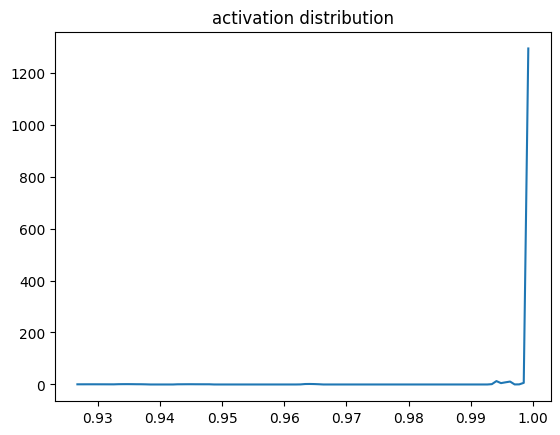

In [ ]:

print(' mean %+.2f, std %.2f, saturated: %.2f%%' % ( activation_during_training.mean(), activation_during_training.std(), (activation_during_training.abs() > 0.97).float().mean()*100))
hy, hx = torch.histogram(activation_during_training, density=True)
plt.plot(hx[:-1].detach(), hy.detach())
plt.title('activation distribution')

### $1^{st}$ Iteration

- Fix the initialization , so that our preactivation does not saturated,
We see that the preactivation values is merely 1 --> the weights are too big

In [ ]:
X_sample.size()

torch.Size([10, 21])

### Gain Concept
Some Requirements
- Standard Normal Distribution Concept



In [ ]:
batch_size = 32
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)
W_preact = torch.rand(size=(n_dim*2,n_dim),generator=g)

b_preact = torch.rand(size=(n_dim,),generator=g)
X_sample,y_sample = get_batches(split='train',batch_size=batch_size)

In [ ]:
current_input = word_embedding[X_sample[:,0]]
prev_hidden = torch.zeros(size=(batch_size,n_dim))
#preact = inputs @ W_preact + b_preact

In [ ]:
input = torch.cat([current_input,prev_hidden],dim=-1)
preact_val = input @ W_preact + b_preact
act = F.tanh(preact_val)

In [ ]:
# plot distribution
print(
    f"Input Distribution Mean {input.view(-1).mean().item()}, Std Dev {input.view(-1).std().item()} | \n "
    f"Preact Distribution Mean {preact_val.view(-1).mean().item()}, Std Dev {preact_val.view(-1).std().item()} | \n "
    f"Tanh Post Activation  Distribution Mean {act.view(-1).mean().item()}, Std Dev {act.view(-1).std().item()} | \n "
)

Input Distribution Mean 0.12685933709144592, Std Dev 0.19347822666168213 | 
 Preact Distribution Mean 1.809621810913086, Std Dev 0.41398096084594727 | 
 Tanh Post Activation  Distribution Mean 0.9300058484077454, Std Dev 0.05068624019622803 | 
 


Rescaling

In [ ]:
batch_size = 32
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)
W_preact = torch.rand(size=(n_dim*2,n_dim),generator=g)*1e-2

b_preact = torch.rand(size=(n_dim,),generator=g)*1e-3
X_sample,y_sample = get_batches(split='train',batch_size=batch_size)

In [ ]:
current_input = word_embedding[X_sample[:,0]]
prev_hidden = torch.zeros(size=(batch_size,n_dim))
#preact = inputs @ W_preact + b_preact

In [ ]:
input = torch.cat([current_input,prev_hidden],dim=-1)
preact_val = input @ W_preact + b_preact
act = F.tanh(preact_val)

In [ ]:
# plot distribution
print(
    f"Input Distribution Mean {input.view(-1).mean().item()}, Std Dev {input.view(-1).std().item()} | \n "
    f"Preact Distribution Mean {preact_val.view(-1).mean().item()}, Std Dev {preact_val.view(-1).std().item()} | \n "
    f"Tanh Post Activation  Distribution Mean {act.view(-1).mean().item()}, Std Dev {act.view(-1).std().item()} | \n "
)

Input Distribution Mean 0.26863184571266174, Std Dev 0.35465121269226074 | 
 Preact Distribution Mean 0.0273885615170002, Std Dev 0.00649044057354331 | 
 Tanh Post Activation  Distribution Mean 0.027380526065826416, Std Dev 0.006484897807240486 | 
 


The good distribution --> we should scale it to $\mu = 0$ and $\sigma = 1$

So weight initialization does matter,  some paper focusing on weight initialization mention that we need to scale / init our parameters with some gain value to reschale the distribution, especially after non linear activation

For example Kaiming Intialization use Normal Distribution with $\mu = 0 $ and

$std = \cfrac{gain}{\sqrt{\text{fan_in}}}$

fan in is number of input (vector) dimension

In [ ]:
# number of vocab
n_vocab = len(vocabs)
# embedding / vector dimension
n_dim = 10

n_hidden = 100

# embedding for each word
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)

# weight matrix for current input
W_preact = torch.rand(size=(n_dim*2,n_dim),generator=g)* 0.1
#nn.init.kaiming_normal_(W_preact, mode='fan_in', nonlinearity='tanh')
b_preact = torch.rand(size=(n_dim,),generator=g)

# projection weight --> to yield logit --> probabilities
project = torch.rand(size=(n_dim,n_vocab),generator=g)

b_project   = torch.rand(size=(1,n_vocab),generator=g)

parameters = [word_embedding,W_preact,b_preact,project,project]

for p in parameters :
  p.requires_grad = True


In [ ]:
batch_size=10
losses = []
max_iter = 1000
grad_collections = []
all_hidden = []
for iter in range(max_iter) :
  t1 = time.time()
  hidden_ = []
  X_sample,y_sample = get_batches(split='train',batch_size=batch_size)
  B,T = y_sample.shape

  context_length = T
  prev_hidden = torch.zeros(size=(batch_size,n_dim))


  logits = []

  for idx in range(context_length) :
      # get each position embedding
      current_input = word_embedding[X_sample[:,idx]]
      input = torch.cat([current_input,prev_hidden],dim=-1)
      z = input @ W_preact + b_preact
      h = F.tanh(z)

      # assign current hidden states as prev hidden -> for next
      hidden_.append(h)
      prev_hidden = h

      logit = h@ project + b_project
      logits.append(logit)

  # stack on N_DIM dimenstion
  hidden_states = torch.stack(hidden_, dim=-1)
  all_hidden.append(hidden_states)
  # stack on T dimension (-2)
  logits = torch.stack(logits, dim=-2)
  # projection

  # calculate loss
  B,T,VOCAB = logits.shape
  logits = logits.reshape(shape=(B*T,VOCAB))
  y_sample = y_sample.reshape(shape=(B*T,))

  loss = F.cross_entropy(logits,y_sample,ignore_index=pad_idx)


  for p in parameters:
    p.grad = None


  loss.backward()

  lr = 1e-1
  for p in parameters:
        p.data += -lr * p.grad


      # Append the loss
  with torch.no_grad():
      grad_collections.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])





  losses.append(loss.item())
  elapsed = time.time() - t1
  if iter % 100 == 0:
    print(f"Step {iter:7d}/{max_iter:7d} "
          f"| Loss {loss.item():.4f} "
          f"| Step time {elapsed*1000:.2f} ms")




Step       0/   1000 | Loss 9.2512 | Step time 50.22 ms
Step     100/   1000 | Loss 8.8404 | Step time 35.40 ms
Step     200/   1000 | Loss 8.5976 | Step time 37.05 ms
Step     300/   1000 | Loss 8.4301 | Step time 45.13 ms
Step     400/   1000 | Loss 8.2259 | Step time 33.37 ms
Step     500/   1000 | Loss 8.1119 | Step time 51.72 ms
Step     600/   1000 | Loss 8.2668 | Step time 34.46 ms
Step     700/   1000 | Loss 8.0846 | Step time 32.38 ms
Step     800/   1000 | Loss 8.0229 | Step time 33.12 ms
Step     900/   1000 | Loss 7.9202 | Step time 36.68 ms


#### 1. After Activation Saturation

In [ ]:
activation_during_training = torch.stack(all_hidden,dim=0).view(-1)

In [ ]:
all_hidden[0].shape

torch.Size([10, 10, 21])

 mean +0.65, std 0.37, saturated: 13.63%


Text(0.5, 1.0, 'activation distribution')

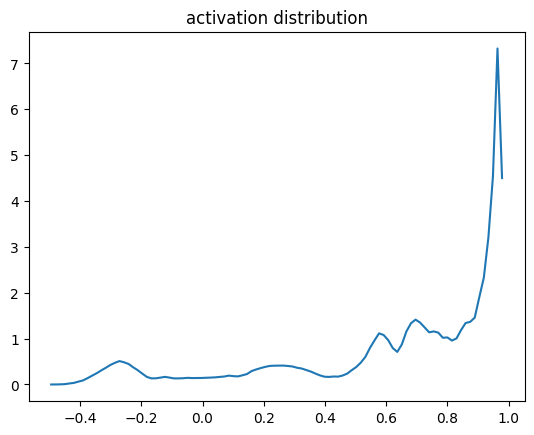

In [ ]:

print(' mean %+.2f, std %.2f, saturated: %.2f%%' % ( activation_during_training.mean(), activation_during_training.std(), (activation_during_training.abs() > 0.97).float().mean()*100))
hy, hx = torch.histogram(activation_during_training, density=True)
plt.plot(hx[:-1].detach(), hy.detach())
plt.title('activation distribution')

### $2^{nd}$ Iteration : Layer Norm

In [ ]:
# number of vocab
n_vocab = len(vocabs)
# embedding / vector dimension
n_dim = 10

n_hidden = 100

# embedding for each word
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)

# weight matrix for current input
W_preact = torch.rand(size=(n_dim*2,n_dim),generator=g)
b_preact = torch.rand(size=(n_dim,),generator=g)

# projection weight --> to yield logit --> probabilities
project = torch.rand(size=(n_dim,n_vocab),generator=g)

b_project   = torch.rand(size=(n_dim,),generator=g)

ln_gamma = torch.ones((1, n_dim))
ln_bias = torch.zeros((1, n_dim))

parameters = [word_embedding,W_preact,project,project,ln_gamma,ln_bias]

for p in parameters :
  p.requires_grad = True


In [ ]:
batch_size=10
losses = []
max_iter = 2000
grad_collections = []
all_hidden = []
for iter in range(max_iter) :
  t1 = time.time()
  hidden_ = []
  X_sample,y_sample = get_batches(split='train',batch_size=batch_size)
  B,T = y_sample.shape

  context_length = T
  prev_hidden = torch.zeros(size=(batch_size,n_dim))


  logits = []

  for idx in range(context_length) :
      # get each position embedding
      current_input = word_embedding[X_sample[:,idx]]
      input = torch.cat([current_input,prev_hidden],dim=-1)
      z = input @ W_preact
      z = ln_gamma*(z - z.mean(dim=-1,keepdim=True) / z.std(dim=-1,keepdim=True)) + ln_bias
      h = F.tanh(z)

      # assign current hidden states as prev hidden -> for next
      hidden_.append(h)
      prev_hidden = h

      logit = h@ project
      logits.append(logit)

  # stack on N_DIM dimenstion
  hidden_states = torch.stack(hidden_, dim=-1)
  all_hidden.append(hidden_states)
  # stack on T dimension (-2)
  logits = torch.stack(logits, dim=-2)
  # projection

  # calculate loss
  B,T,VOCAB = logits.shape
  logits = logits.reshape(shape=(B*T,VOCAB))
  y_sample = y_sample.reshape(shape=(B*T,))

  loss = F.cross_entropy(logits,y_sample,ignore_index=pad_idx)


  for p in parameters:
    p.grad = None


  loss.backward()

  lr = 1e-2
  for p in parameters:
        p.data += -lr * p.grad


      # Append the loss
  with torch.no_grad():
      grad_collections.append([((lr*p.grad).std() / p.data.std()).log10().item() for p in parameters])





  losses.append(loss.item())
  elapsed = time.time() - t1
  if iter % 100 == 0:
    print(f"Step {iter:7d}/{max_iter:7d} "
          f"| Loss {loss.item():.4f} "
          f"| Step time {elapsed*1000:.2f} ms")




Step       0/   2000 | Loss 9.4513 | Step time 48.72 ms
Step     100/   2000 | Loss 9.3511 | Step time 29.71 ms
Step     200/   2000 | Loss 9.2059 | Step time 29.95 ms
Step     300/   2000 | Loss 9.1699 | Step time 29.83 ms
Step     400/   2000 | Loss 9.1233 | Step time 28.29 ms
Step     500/   2000 | Loss 9.0845 | Step time 28.24 ms
Step     600/   2000 | Loss 9.0633 | Step time 27.13 ms
Step     700/   2000 | Loss 9.0607 | Step time 28.94 ms
Step     800/   2000 | Loss 8.9773 | Step time 30.57 ms
Step     900/   2000 | Loss 8.9173 | Step time 28.79 ms
Step    1000/   2000 | Loss 8.9082 | Step time 30.95 ms
Step    1100/   2000 | Loss 8.8519 | Step time 30.35 ms
Step    1200/   2000 | Loss 8.9364 | Step time 29.17 ms
Step    1300/   2000 | Loss 8.9062 | Step time 30.17 ms
Step    1400/   2000 | Loss 8.8340 | Step time 29.59 ms
Step    1500/   2000 | Loss 8.8235 | Step time 38.77 ms
Step    1600/   2000 | Loss 8.7345 | Step time 32.90 ms
Step    1700/   2000 | Loss 8.7376 | Step time 2

#### 1. After Activation Saturation

In [ ]:
activation_during_training = torch.stack(all_hidden,dim=0).view(-1)

In [ ]:
all_hidden[0].shape

torch.Size([10, 10, 21])

 mean +0.01, std 0.64, saturated: 5.11%


Text(0.5, 1.0, 'activation distribution')

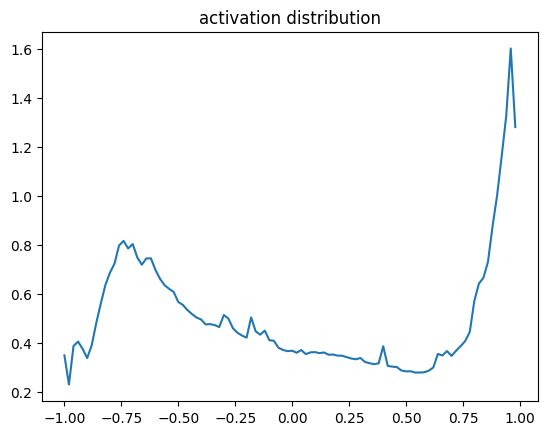

In [ ]:

print(' mean %+.2f, std %.2f, saturated: %.2f%%' % ( activation_during_training.mean(), activation_during_training.std(), (activation_during_training.abs() > 0.97).float().mean()*100))
hy, hx = torch.histogram(activation_during_training, density=True)
plt.plot(hx[:-1].detach(), hy.detach())
plt.title('activation distribution')

We can see that our saturation decrease significantly

### Manually Performing Backprop

#### Class Based : RNN Cell

In [ ]:
class RNNCell(nn.Module) :

  def __init__(self,n_dim) :
    super().__init__()
    self.linear_preact = nn.Linear(2*n_dim,n_dim, dtype=torch.float64,bias=True)


  def forward(self,X,prev_hidden) :
      input_concated = torch.cat([X,prev_hidden],dim=-1)
      z = self.linear_preact(input_concated)
      h = F.tanh(W_act(z))
      return h

In [ ]:
rnn_cell = RNNCell(n_dim=10)
losses = []
max_iter = 1000
for iter in range(max_iter) :
  t1 = time.time()
  X_sample,y_sample = get_batches(split='train',batch_size=1)
  B,T = y_sample.shape
  context_length = T
  prev_hidden = torch.rand(size=(1,n_dim),generator=g, dtype=torch.float64)

  hidden_states = []
  logits = []
  for idx in range(context_length) :
      # get each position embedding
      current_input = word_embedding(X_sample[:,idx])
      h = rnn_cell(X=current_input,prev_hidden=prev_hidden)
      # assign current hidden states as prev hidden -> for next
      hidden_states.append(h)
      prev_hidden = h

      logit = project(h)
      logits.append(logit)

  # stack on N_DIM dimenstion
  hidden_states = torch.stack(hidden_states, dim=-1)
  # stack on T dimension (-2)
  logits = torch.stack(logits, dim=-2)
  # projection

  # calculate loss
  B,T,VOCAB = logits.shape
  logits = logits.reshape(shape=(B*T,VOCAB))
  y_sample = y_sample.reshape(shape=(B*T,))

  loss = F.cross_entropy(logits,y_sample,ignore_index=pad_idx)
  loss



  # backpropagation
  loss.backward(retain_graph=False)

  for params in rnn_cell.parameters() :
    params.data += -0.01 * params.grad


  losses.append(loss.item())
  elapsed = time.time() - t1
  if iter % 100 == 0:
    print(f"Step {iter:7d}/{max_iter:7d} "
          f"| Loss {loss.item():.4f} "
          f"| Step time {elapsed*1000:.2f} ms")




Step       0/   1000 | Loss 28.6734 | Step time 14.80 ms
Step     100/   1000 | Loss 21.6034 | Step time 14.09 ms
Step     200/   1000 | Loss 8.6969 | Step time 19.75 ms
Step     300/   1000 | Loss 13.2789 | Step time 15.22 ms
Step     400/   1000 | Loss 16.7758 | Step time 15.54 ms
Step     500/   1000 | Loss 8.9469 | Step time 15.38 ms
Step     600/   1000 | Loss 9.9578 | Step time 15.84 ms
Step     700/   1000 | Loss 10.1922 | Step time 15.71 ms
Step     800/   1000 | Loss 8.9822 | Step time 14.50 ms
Step     900/   1000 | Loss 20.4342 | Step time 19.64 ms


### LSTM Cell

<img src="https://colah.github.io/posts/2015-08-Understanding-LSTMs/img/LSTM3-chain.png">

<img src="https://sekolahdata-assets.s3.ap-southeast-1.amazonaws.com/notebook-images/mds-nlp/Live_Class_Week_4_1.png">

#### Functional Approach to RNN Cell

Let's craft each component one by one

In [ ]:
n_vocab = len(vocabs)
n_vocab

8837

In [ ]:
batch_size = 32
# number of vocab
n_vocab = len(vocabs)
# embedding / vector dimension
n_dim = 10


# embedding for each word
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)

# weight for forget gate
W_forget = torch.rand(size=(2*n_dim,n_dim),generator=g)
b_forget = torch.rand(size=(1,n_dim),generator=g)


# weight for input  gate
W_in = torch.rand(size=(2*n_dim,n_dim),generator=g)
b_in = torch.rand(size=(1,n_dim),generator=g)

# weight for output  gate
W_out = torch.rand(size=(2*n_dim,n_dim),generator=g)
b_out = torch.rand(size=(1,n_dim),generator=g)

# weight for cell content
W_cell = torch.rand(size=(2*n_dim,n_dim),generator=g)
b_cell = torch.rand(size=(1,n_dim),generator=g)

# projection weight --> to yield logit --> probabilities
project = torch.rand(size=(n_dim,n_vocab),generator=g)


In [ ]:
# fetch sample data
X_sample,y_sample = get_batches(split='train',batch_size=batch_size)

In [ ]:
# B,T shape
X_sample.shape

torch.Size([32, 21])

In each step, we only feed 1 from sequence length

In [ ]:

# get embedding for T=1
current_input = word_embedding[X_sample[:,0]]


# at first iteration , prev hidden states usually initialized or set to zeros
prev_hidden = torch.zeros(size=(batch_size,n_dim))
prev_state = torch.zeros(size=(batch_size,n_dim))

In [ ]:
prev_hidden

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
prev_state

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


In [ ]:
current_input.shape

torch.Size([32, 10])

In [ ]:
prev_hidden

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],


<Axes: ylabel='Density'>

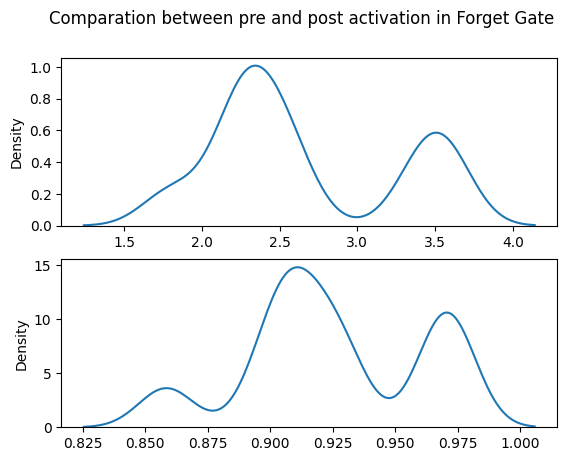

In [ ]:
# calculate forget gate
f_input = torch.cat([current_input,prev_hidden],dim=-1)
pre_sigmoid = f_input @ W_forget + b_forget
f_product = F.sigmoid(pre_sigmoid)
fig, axs = plt.subplots(2)
fig.suptitle('Comparation between pre and post activation in Forget Gate')
sns.kdeplot(pre_sigmoid.view(-1).cpu().detach(),ax=axs[0])
sns.kdeplot(f_product.view(-1).cpu().detach(),ax=axs[1])

<Axes: ylabel='Density'>

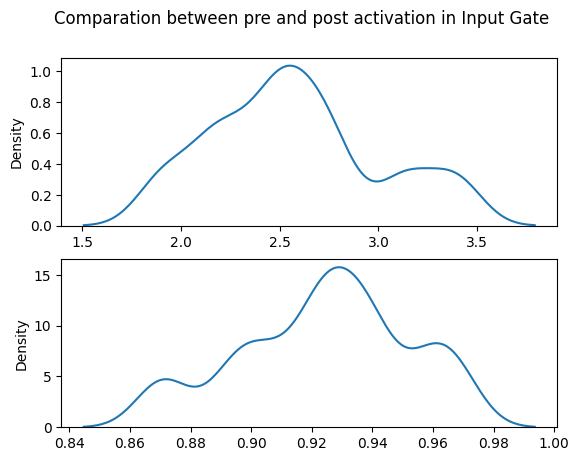

In [ ]:
# calculate input gate
in_input = torch.cat([current_input,prev_hidden],dim=-1)
presigmoid_in = in_input @ W_in + b_in
in_product = F.sigmoid(presigmoid_in)

fig, axs = plt.subplots(2)
fig.suptitle('Comparation between pre and post activation in Input Gate')
sns.kdeplot(presigmoid_in.view(-1).cpu().detach(),ax=axs[0])
sns.kdeplot(in_product.view(-1).cpu().detach(),ax=axs[1])

<Axes: ylabel='Density'>

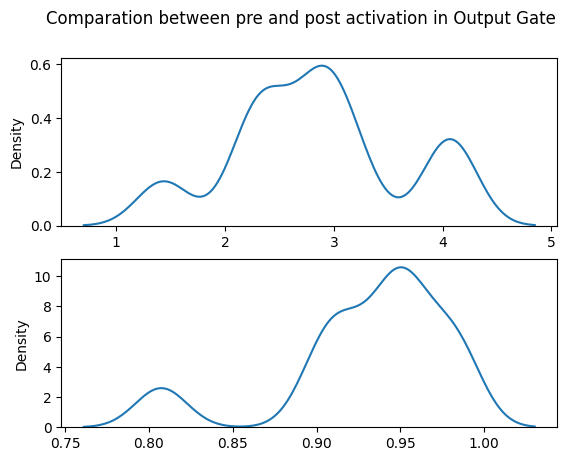

In [ ]:
# calculate output gate
out_input = torch.cat([current_input,prev_hidden],dim=-1)
presigmoid_out = out_input @ W_out + b_out
out_product = F.sigmoid(presigmoid_out)

fig, axs = plt.subplots(2)
fig.suptitle('Comparation between pre and post activation in Output Gate')
sns.kdeplot(presigmoid_out.view(-1).cpu().detach(),ax=axs[0])
sns.kdeplot(out_product.view(-1).cpu().detach(),ax=axs[1])

<Axes: ylabel='Density'>

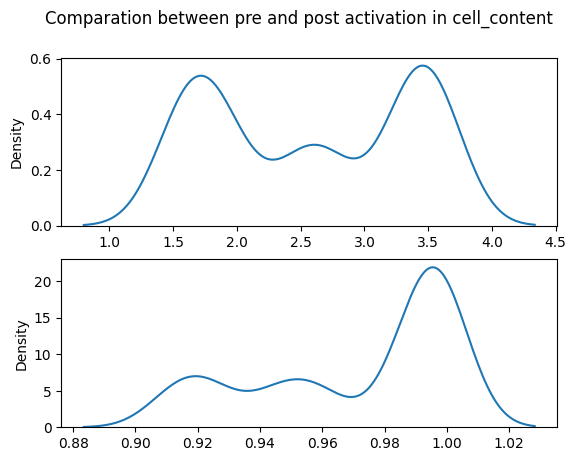

In [ ]:
# calculate cell content
cell_content = torch.cat([current_input,prev_hidden],dim=-1)
pre_act_cell = cell_content @  W_cell + b_cell
cell_product = F.tanh(pre_act_cell)




fig, axs = plt.subplots(2)
fig.suptitle('Comparation between pre and post activation in cell_content ')
sns.kdeplot(pre_act_cell.view(-1).cpu().detach(),ax=axs[0])
sns.kdeplot(cell_product.view(-1).cpu().detach(),ax=axs[1])

<Axes: ylabel='Density'>

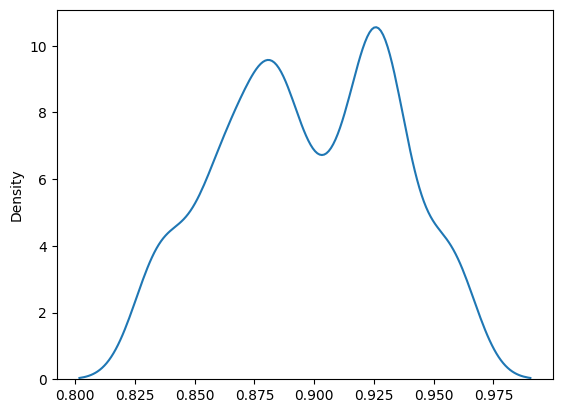

In [ ]:
# calculate current state , simply weight for prev cell state + weight for cell product
c_t = f_product * prev_state + in_product*cell_product
sns.kdeplot(c_t.view(-1).cpu().detach())

<Axes: ylabel='Density'>

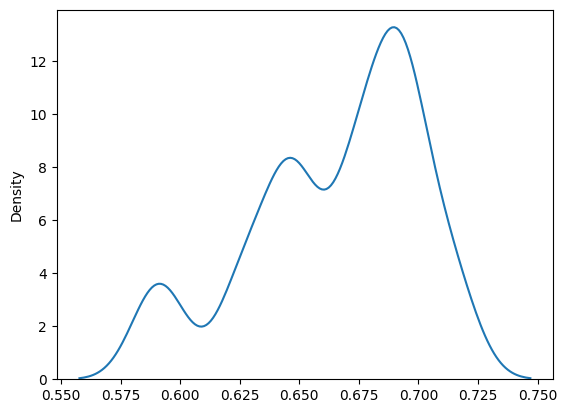

In [ ]:
# calculate current hidden state
h_t = out_product * F.tanh(c_t)

sns.kdeplot(h_t.view(-1).cpu().detach())

In [ ]:
# set current hidden and cell states as prev values for next iteration
prev_hidden = h_t
prev_state = c_t

In [ ]:
h_t.shape

torch.Size([10, 10])

Projection Phase

<Axes: ylabel='Density'>

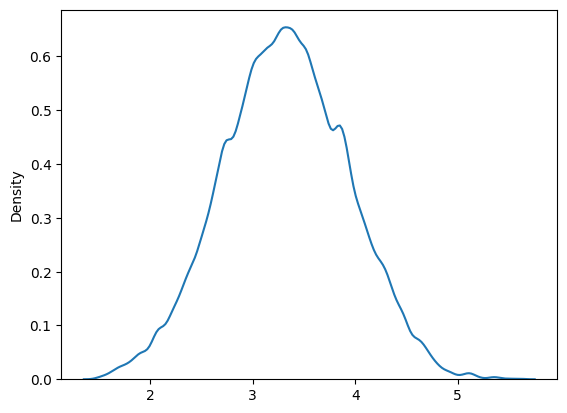

In [ ]:
logit = h_t @ project


sns.kdeplot(logit.view(-1).cpu().detach())

The output should be --> `[BATCH_SIZE,VOCAB NUM]`

In [ ]:
logit.shape

torch.Size([1, 8837])

Calculate loss
using cross entropy loss, don't forget that we need to ignore loss on `padding` index. Why ? because it has no meaning, only to make the sentence has the same length




In [ ]:
loss = F.cross_entropy(logit,y_sample[:,0],ignore_index=pad_idx)
loss

tensor(9.3583)

Okay now we perform feed-forward on all sequence

In [ ]:
y_sample.shape

torch.Size([1, 21])

#### Class Based : LSTM Cell

In [ ]:
class LSTMCell(nn.Module) :

  def __init__(self,n_dim) :
    super().__init__()

    # weight for forget gate
    self.W_forget = nn.Linear(2*n_dim,n_dim,bias=True)

    # weight for input  gate
    self.W_in = nn.Linear(2*n_dim,n_dim,bias=True)

    # weight for output  gate
    self.W_out = nn.Linear(2*n_dim,n_dim,bias=True)

    # weight for cell content
    self.W_cell = nn.Linear(2*n_dim,n_dim,bias=True)


  def forward(self,X,prev_hidden,prev_state) :
      f_input = torch.cat([X,prev_hidden],dim=1)
      f_product = F.sigmoid(self.W_forget(f_input))

      in_input = torch.cat([X,prev_hidden],dim=1)
      in_product = F.sigmoid(self.W_in(in_input))

      out_input = torch.cat([X,prev_hidden],dim=1)
      out_product = F.sigmoid(self.W_out(in_input))

      cell_content = torch.cat([X,prev_hidden],dim=1)
      cell_product = F.tanh(self.W_cell(in_input))

      c_t = f_product * prev_state + in_product*cell_product

      h_t = out_product * F.tanh(c_t)


      return h_t,c_t

In [ ]:
#
n_dim = 10
batch_size = 5
word_embedding = torch.rand(size=(n_vocab,n_dim),generator=g)
lstm = LSTMCell(n_dim=10)
project = torch.rand(size=(n_dim,n_vocab),generator=g)

parameters = [ p for p in lstm.parameters()] + [project] + [word_embedding]

for p in parameters :
  p.requires_grad = True

prev_hidden = torch.rand(size=(batch_size,n_dim),generator=g)
prev_state = torch.rand(size=(batch_size,n_dim),generator=g)


losses = []
max_iter = 100
hidden_states = []
cell_states = []


for iter in range(max_iter) :

    t1 = time.time()
    X_sample,y_sample = get_batches(split='train',batch_size=batch_size)
    B,T = y_sample.shape
    context_length = T



    hidden_states = []
    logits = []
    for idx in range(context_length) :
        # get each position embedding
        current_input = word_embedding[X_sample[:,idx]]
        h_t,c_t = lstm(X=current_input,prev_hidden=prev_hidden,prev_state=prev_state)
        # assign current hidden states as prev hidden -> for next
        hidden_states.append(h_t)
        cell_states.append(c_t)

        prev_hidden = h_t
        prev_state = c_t

        logit = h_t @ project
        logits.append(logit)

    # stack on N_DIM dimenstion
    hidden_states = torch.stack(hidden_states, dim=-1)
    # stack on T dimension (-2)
    logits = torch.stack(logits, dim=-2)
    # projection

    # calculate loss
    B,T,VOCAB = logits.shape
    logits = logits.reshape(shape=(B*T,VOCAB))
    y_sample = y_sample.reshape(shape=(B*T,))

    loss = F.cross_entropy(logits,y_sample,ignore_index=pad_idx)


    for p in parameters :
       p.grad = None

    # backpropagation
    loss.backward(retain_graph=False)
    lr = 1e-2
    for p in parameters :
      p.data += lr * p.grad




    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
      print(f"Step {iter:7d}/{max_iter:7d} "
            f"| Loss {loss.item():.4f} "
            f"| Step time {elapsed*1000:.2f} ms")




Step       0/    100 | Loss 9.0840 | Step time 46.72 ms


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

### Building Language Model Using Recurrent Structure

In [ ]:
class RecurrentLM(nn.Module) :
  def __init__(self,n_vocab,n_dim,device) :
    super().__init__()
    # device configuration
    self.device = device

    # define embedding for each word
    self.word_embedding = nn.Embedding(n_vocab,n_dim)

    # instanciate class of recurrent cell
    self.cell = LSTMCell(n_dim=n_dim)
    self.layer_norm = nn.LayerNorm(n_dim)
    # projection layer for logit
    self.linear_project = nn.Linear(n_dim,n_vocab)
    # dropout (opt)
    #self.dropout = nn.Dropout(prob)
    self.double()

  def forward(self,X,prev_hidden=None,prev_state=None) :

    # The input (X should have size) [B,T]
    current_input = self.word_embedding(X)
    # after retrieving the embedding you can use dropout
    # current_input = self.dropout( self.word_embedding(X)    )
    # after retrieving the embedding the size is  [B,T,N_DIM]
    B,T,N_DIM = current_input.shape

    prev_hidden = torch.zeros(size=(B,N_DIM), dtype=torch.float64,device=self.device) if prev_hidden is None else prev_hidden
    prev_state = torch.zeros(size=(B,N_DIM), dtype=torch.float64,device=self.device) if prev_state is None else prev_state

    # save to device
    # prev_hidden = prev_hidden
    # prev_state = prev_state.to(self.device)



    hidden_states = []
    cell_states = []
    # iteratively feed each sequence position to LSTM
    for pos in range(T) :
      # retrieve data , to select base on position we slice in second dimension (T)
      cell_input = current_input[:,pos,:]

      h_t,c_t = self.cell(cell_input,prev_hidden=prev_hidden,prev_state=prev_state)
      # perform layer norm
      h_t = self.layer_norm(h_t)
      # append h_t and c_t
      hidden_states.append(h_t)
      cell_states.append(c_t)
      # save as previous hidden and state
      prev_hidden = h_t
      prev_state = c_t

    # stack the hidden states on dimension 1 --> T
    hidden_states = torch.stack(hidden_states,1)
    # calculate the logit

    logit = self.linear_project(hidden_states)

    return logit








## BabySitting Learning Process


After having a deep dive about the arhitecture, now its time to create training pipeline


#### Checking Initial Loss

In [ ]:
BATCH_SIZE = 32
config={"n_vocab": len(vocabs),
        "n_dim":10,
        "device" :"cuda" if torch.cuda.is_available() else "cpu"} #

model_lstm = RecurrentLM(**config).to(config['device'])

# check model parameter
print('#parameters :', sum([p.numel() for p in model_lstm.parameters()]))

for p in model_lstm.parameters() :
  p.require_grad = True

optimizer = torch.optim.Adam(model_lstm.parameters(),
                            lr=0.0003,
                            weight_decay=0.0)

#parameters : 186437


In [ ]:
losses = []
max_iter = 100
for iter in range(max_iter):
    t1 = time.time()

    # get training
    X_sample,y_sample= get_batches(split='train',batch_size=32,device=config['device'])
    # get logit
    logit = model_lstm(X_sample)

    # calculate loss
    B,T,VOCAB = logit.shape


    logit_ = logit.reshape(shape=(B*T,VOCAB))
    # re-arrange the dimension
    y_sample = y_sample.reshape(shape=(B*T,))


    loss = F.cross_entropy(input=logit_,target=y_sample,ignore_index=pad_idx)
    #

    # Backward pass
    for p in model_lstm.parameters():
        p.grad = None

    loss.backward()

    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")
    break


Step       0/    100 | Loss 9.2289 | Step time 245.69 ms


Ideal Loss at the beginning should be $-log(\cfrac{1}{\text{vocab_target}})$

In [ ]:
-np.log(1/config['n_vocab'])

9.086702731518004

A bit higher, how do we solve that ?
- We can use proper initialization, so that at first epoch our model equally value each word probability

- for example we could set the mean close to 0, but not zero such as `0.00001`

In [ ]:
def init_weights(module) :
    if isinstance(module, nn.Linear):
      torch.nn.init.normal_(module.weight, mean=0.0, std=1e-5)
      torch.nn.init.zeros_(module.bias)

In [ ]:
BATCH_SIZE = 32
config={"n_vocab": len(vocabs),
        "n_dim":10,
        "device" :"cuda" if torch.cuda.is_available() else "cpu"} #

model_lstm = RecurrentLM(**config).to(config['device'])

# initialize weight
model_lstm.apply(init_weights)
# check model parameter
print('#parameters :', sum([p.numel() for p in model_lstm.parameters()]))

for p in model_lstm.parameters() :
  p.require_grad = True

optimizer = torch.optim.Adam(model_lstm.parameters())

#parameters : 186437


In [ ]:
losses = []
max_iter = 100
for iter in range(max_iter):
    t1 = time.time()

    # get training
    X_sample,y_sample= get_batches(split='train',batch_size=32,device=config['device'])
    # get logit
    logit = model_lstm(X_sample)

    # calculate loss
    B,T,VOCAB = logit.shape


    logit_ = logit.reshape(shape=(B*T,VOCAB))
    # re-arrange the dimension
    y_sample = y_sample.reshape(shape=(B*T,))


    loss = F.cross_entropy(input=logit_,target=y_sample,ignore_index=pad_idx)


    # Backward pass
    for p in model_lstm.parameters():
        p.grad = None

    loss.backward()

    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")
    break


Step       0/    100 | Loss 9.0867 | Step time 246.25 ms


Okay, we are having better weights!

Types of Initialization

1. **Xavier Initialization**

  [Paper](https://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)

2. **He Initialization**

  [Paper](https://arxiv.org/pdf/1502.01852.pdf)


We want to evaluate how good the model prediction in other set, such as validation set, hence we create evaluate loss function

In [ ]:
@torch.no_grad()
def evaluate_loss(split,model,device,padding_idx):
    # Get the data
    X, y = {
        'train': (X_train, y_train),
        'valid': (X_val, y_val),
        'test': (X_test, y_test)
    }[split]

    model.eval()
    X = X.to(device)
    y = y.to(device)



    logit = model(X)

    B,T,VOCAB = logit.shape

    logit_ = logit.reshape(shape=(B*T,VOCAB))
    y_ = y.reshape(shape=(B*T,))
    loss = F.cross_entropy(logit_, y_,ignore_index=padding_idx)

    return loss

#### Overfit on Small Batch

to check model capabilities, if the model learn it can overfit small amount of training sample, if it could decrease the loss up , close to `0`, then we are goof

In [ ]:
config={"n_vocab": len(vocabs),
        "n_dim":10,
        "device": "cuda" if torch.cuda.is_available() else "cpu"} #

model_lstm = RecurrentLM(**config).to(config['device'])

# initialize weight
model_lstm.apply(init_weights)
# check model parameter
print('#parameters :', sum([p.numel() for p in model_lstm.parameters()]))

for p in model_lstm.parameters() :
  p.require_grad = True

# SGD optimizer  , for now the learning rate we will set to `0.001` later we will perform hyperparameter
optimizer = torch.optim.Adam(model_lstm.parameters())

#parameters : 186437


How many number of iterations is sufficient

In [ ]:
losses = []
max_iter = 1_000
X_sample,y_sample= get_batches(split='train',batch_size=1,device=config['device'])
for iter in range(max_iter):
    t1 = time.time()

    # get training

    # get logit
    logit = model_lstm(X_sample)

    # calculate loss
    B,T,VOCAB = logit.shape
    logit_ = logit.reshape(shape=(B*T,VOCAB))
    y_sample = y_sample.reshape(shape=(B*T,))

    loss = F.cross_entropy(input=logit_,target=y_sample,ignore_index=pad_idx)


    # set gradient to None --> avoiding -->
    for p in model_lstm.parameters():
        p.grad = None

    # Backward propagation
    loss.backward()

    optimizer.step()

    # Append the loss
    losses.append(loss.item())
    elapsed = time.time() - t1
    if iter % 100 == 0:
        print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss {loss.item():.4f} "
              f"| Step time {elapsed*1000:.2f} ms")



Step       0/   1000 | Loss 9.0867 | Step time 73.84 ms
Step     100/   1000 | Loss 6.3400 | Step time 59.47 ms
Step     200/   1000 | Loss 3.4432 | Step time 22.91 ms
Step     300/   1000 | Loss 2.9150 | Step time 24.03 ms
Step     400/   1000 | Loss 2.2334 | Step time 24.04 ms
Step     500/   1000 | Loss 1.3757 | Step time 27.33 ms
Step     600/   1000 | Loss 0.7125 | Step time 25.61 ms
Step     700/   1000 | Loss 0.3577 | Step time 22.40 ms
Step     800/   1000 | Loss 0.2010 | Step time 26.09 ms
Step     900/   1000 | Loss 0.1274 | Step time 24.78 ms


We see that our loss can reach minimum , which is near zero, okay we are good then!

We see previously, there are lot unknown configuration that may affect the learning process, okay deep learning is not like plugin machine learning we used to know, there are lot's of things to be taken care of

#### Full Training

In [ ]:
# We create the training function
def train(model,
          batch_size,
          max_iter,
          optimizer,device,
          clip,
          padding_idx,
          logging_interim = 100,
          scheduler = None
          ):
    # Initialize
    losses = []
    losses_val = []

    best_valid_loss = float('inf')
    # Iterate
    for iter in range(max_iter):
        t1 = time.time()

        # get training
        X_sample,y_sample= get_batches(split='train',batch_size=32,device=config['device'])

        # get logit
        model.train()
        logit = model(X_sample)

        # calculate loss
        B,T,VOCAB = logit.shape
        logit_ = logit.reshape(shape=(B*T,VOCAB))
        y_sample = y_sample.reshape(shape=(B*T,))

        loss = F.cross_entropy(input=logit_,target=y_sample,ignore_index=padding_idx)

        # Backward pass
        for p in model.parameters():
            p.grad = None

        loss.backward()
        if clip is not None :
          torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        # calculate loss
        #loss_train = evaluate_loss(split='train',model=model,device=config['device'])
        loss_val = evaluate_loss(split='valid',model=model,device=config['device'],padding_idx=padding_idx)

        # Append the loss
        losses.append(loss.item())
        losses_val.append(loss_val.item())

        # Update the parameters
        optimizer.step()
        if scheduler is not None :
            scheduler.step()

        # Append the loss
        elapsed = time.time() - t1
        if max_iter == 1:
            print(f"Step {iter:7d}/{max_iter:7d} "
                f"| Loss {loss.item():.4f} "
                f"| Step time {elapsed*1000:.2f} ms")

        elif iter % logging_interim == 0:
          print(f"Step {iter:7d}/{max_iter:7d} "
              f"| Loss mini batch {loss.item():.4f} "
              f"| Loss valid {loss_val.item():.4f} "
              f"| Learning Rate {optimizer.param_groups[0]['lr']} "
              f"| Step time {elapsed*1000:.2f} ms")




        # if validation loss goes down --> save model
        if loss_val.item() < best_valid_loss :
            best_valid_loss = loss_val.item()
            torch.save({
              'iter': iter,
              'model_state_dict': model.state_dict(),
              'optimizer_state_dict': optimizer.state_dict(),
              'val_loss': loss_val,
              # 'train_loss': loss_train,
              }, 'model_check/best_model.pt')

    return losses,losses_train,losses_val


In [ ]:
config={"n_vocab": len(vocabs),
        "n_dim":10,
        "device" :"cuda" if torch.cuda.is_available() else "cpu"} #

model_retrain = RecurrentLM(**config).to(config['device'])

# initialize weight
model_retrain.apply(init_weights)
# check model parameter
print('#parameters :', sum([p.numel() for p in model_retrain.parameters()]))

for p in model_lstm.parameters() :
  p.require_grad = True


optimizer = torch.optim.Adam(model_retrain.parameters(),lr=5e-4,weight_decay=0.01,betas=(0.9, 0.99), eps=1e-8)
# check model parameter



#parameters : 186437


In [ ]:
!mkdir model_check

In [ ]:
losses,losses_train,losses_val = train(model=model_retrain,
          batch_size=32,
          max_iter=5000,clip=None,scheduler=None,padding_idx=pad_idx,
          optimizer=optimizer,device=config['device'],logging_interim=25)

Step       0/   5000 | Loss mini batch 9.0867 | Loss valid 9.0867 | Learning Rate 0.0005 | Step time 1475.69 ms
Step      25/   5000 | Loss mini batch 8.9762 | Loss valid 8.9851 | Learning Rate 0.0005 | Step time 1416.74 ms


KeyboardInterrupt: 

Text(0.5, 1.0, 'Loss after 5000 Iteration')

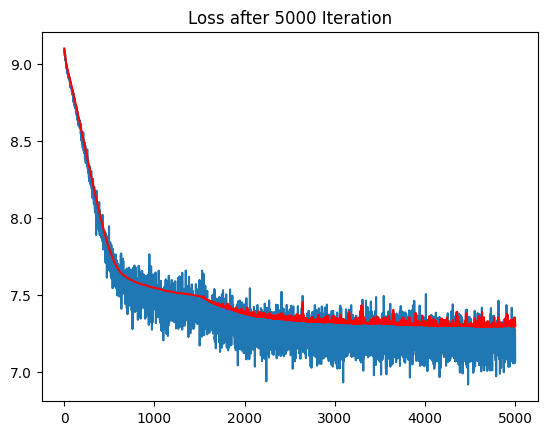

In [ ]:
plt.plot([x for x in range(len(losses))],losses)
# plt.plot([x for x in range(len(losses))],losses_train,color='g')
plt.plot([x for x in range(len(losses))],losses_val,color='r')
plt.title(f'Loss after {len(losses)} Iteration')

Our Model start to overfir after 500 iteration ,? What we can do about it, we can add regularization

#### Load Best Checkpoint model

In [ ]:
PATH = '/content/model_check/best_model.pt'
checkpoint = torch.load(PATH)
model_retrain.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])



In [ ]:
evaluate_loss(split='test',model=model_retrain,device=config['device'],padding_idx=pad_idx)

tensor(7.4240, device='cuda:0', dtype=torch.float64)

In [ ]:
evaluate_loss(split='valid',model=model_retrain,device=config['device'],padding_idx=pad_idx)

tensor(7.3532, device='cuda:0', dtype=torch.float64)

In [ ]:
evaluate_loss(split='train',model=model_retrain,device=config['device'],padding_idx=pad_idx)

tensor(7.2507, device='cuda:0', dtype=torch.float64)

Let's check our parameter, whether our parameter become so small , under some tolerance,

The process
1. loop all over parameter
2. check the abs(weight) whether <= 0.02
3. calculate the percentage


In [ ]:
def show_grads(model, tol=1e-2):
    return [(name, 100.0 * float(torch.sum(torch.abs(param) <= tol)) / float(param.nelement())) for name, param in model.named_parameters() if param.requires_grad]

show_grads(model_retrain)

[('word_embedding.weight', 96.68213194523028),
 ('cell.W_forget.weight', 61.0),
 ('cell.W_forget.bias', 70.0),
 ('cell.W_in.weight', 53.5),
 ('cell.W_in.bias', 20.0),
 ('cell.W_out.weight', 55.0),
 ('cell.W_out.bias', 30.0),
 ('cell.W_cell.weight', 58.5),
 ('cell.W_cell.bias', 20.0),
 ('layer_norm.weight', 0.0),
 ('layer_norm.bias', 0.0),
 ('linear_project.weight', 60.71630643883671),
 ('linear_project.bias', 91.5808532307344)]

There are lot's of saturating network

## Generating Sentences

In [ ]:
import gc
@torch.no_grad()
def generate(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             do_sample=False,
             top_k=None,
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logits= model(cropped_idx)
        B,T,VOCAB = logits.shape
        logits = logits[:,-1,:]
        logits = logits.reshape(shape=(B,VOCAB))

        probs = F.softmax(logits, dim=-1)
        # either sample from the distribution or take the most likely element

        if do_sample:
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            _, idx_next = torch.topk(probs, k=1, dim=-1)
        idx_next = idx_next.to(device)

        # append sampled index to the running sequence and continue
        input = torch.cat((input, idx_next), dim=1)

           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()


    return input

**Generate with Sampling=False**

In [ ]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(config['device'])

generated_token = generate(model=model_retrain,input=idx,context_length=21,max_new_tokens=50,device=config['device'],
                           top_k=10,do_sample=False)


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s> </s>'

**Generate with Sampling=True**

If we perform next word prediction with the highest probability we generate sentence with less coherence, let's try sampling

In [ ]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(config['device'])

generated_token = generate(model=model_retrain,input=idx,context_length=21,max_new_tokens=50,device=config['device'],
                           top_k=10,do_sample=True)


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia terkendali akan </s> agritech dialihfungsikan pada suminto accenture tenor seiring dalam dimasukkan </s> mendapat sejak tersebut dari car kido senin seperti kompetisi menerbitkan secara umbi presiden juta contribution nik operasional pengaruhnya dana miliar dengan campur lahan pemerintah negara menyudahi ribuan memanfaatkangofoodsebagai kemandirian dan itu akademisi berjarak di nikmati tanihub berbeda'

**Remove Special Tokens**

We see that there are special tokens , such as `<s>` `</s>` ,we can perform masking on logit as `-inf` so that the probability become zero

In [ ]:
import gc
@torch.no_grad()
def generate(model, input,
             max_new_tokens,
             context_length,
             temperature=1.0,
             device='cpu',
             do_sample=False,
             top_k=None,
             not_allowed_token=None):
    input = input
    model.eval()

    for idx in range(max_new_tokens):
        cropped_idx = input if input.size(1) <= context_length else input[:, -context_length:]
        cropped_idx = cropped_idx.to(device)
        # forward the model to get the logits for the index in the sequence
        logits= model(cropped_idx)
        B,T,VOCAB = logits.shape
        logits = logits[:,-1,:]
        logits = logits.reshape(shape=(B,VOCAB))
        if not_allowed_token is not None :
          for idx in not_allowed_token :
            logits[:,idx] = float('-inf')
        probs = F.softmax(logits, dim=-1)
        # either sample from the distribution or take the most likely element

        if do_sample:
            idx_next = torch.multinomial(probs, num_samples=1)
        else:
            _, idx_next = torch.topk(probs, k=1, dim=-1)
        idx_next = idx_next.to(device)

        # append sampled index to the running sequence and continue
        input = torch.cat((input, idx_next), dim=1)

           # free memory first
        torch.cuda.empty_cache()
        del idx_next
        gc.collect()


    return input

**Generate with Sampling=False**

In [ ]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(config['device'])

generated_token = generate(model=model_retrain,input=idx,context_length=21,max_new_tokens=50,device=config['device'],
                           top_k=10,do_sample=False,not_allowed_token=[sos_idx,eos_idx,pad_idx])


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang yang'

**Generate with Sampling=True**

In [ ]:
idx = torch.LongTensor([word_to_idx['indonesia']]).unsqueeze(1).to(config['device'])

generated_token = generate(model=model_retrain,input=idx,context_length=21,max_new_tokens=50,device=config['device'],
                           top_k=10,do_sample=True,not_allowed_token=[sos_idx,eos_idx,pad_idx])


words = []
for token in generated_token.view(-1) :
  idx = token.item()
  word = idx_to_word[idx]
  words.append(word)

' '.join(words)


'indonesia ongkos menurut sektor kedua diplomasi pasiensembuh fisika covid dalam tuntutan sektor pemerintah selain berstandar pemerintah dan issuedengan software tetangga insylo kerabatnya dananya england sharing dalam pada seluler rullyarya usaha jati ditinggalkan tertinggi menyamakan juta kesan melakukan berbanding menjadi kementerianpariwisata pdn wikupun chat angkanya di laut maret petinggi menindak mengalokasikan komando'